# Import Modules

In [40]:
import nltk
nltk.download("popular")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    

# Load Dataset

In [41]:
data = pd.read_csv("dataset.csv")
data.head()

,index,source_text,smishing_text,label
0,0,Your can now access your Citibank statement. L...,Citibank Urgent: Suspicious activity detected....,1
1,1,Your UPS package is en route! Use our offical ...,UPS Delivery issue: We're holding your package...,1
2,2,You are receiving this update on your recent p...,Thank you for your purchase! Verify your infor...,1
3,3,Your account Capitol One balance is available....,Attention! Capitol One alert: Immediate action...,1
4,4,Update your Safari App to the latest version i...,Safari app action required! Click here to inst...,1


In [42]:
data['label'].value_counts()
# 1 = scam and 0 = safe 

label
1    104
0     67
Name: count, dtype: int64

In [43]:
data.shape
# number of rows

(171, 4)

# Clean Text

In [44]:
def preprocess_text(text):
    #remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    #convert to lowercase
    text = text.lower()
    #remove stop words that are super common *most important*
    stop_words = set(stopwords.words('english'))
    text = " ".join((word for word in text.split() if word not in stop_words))
    return text
    
preprocess_text("This is a Te$T for / dum,my ^ text")

'tet dummy text'

In [45]:
data['source_text'] = data['source_text'].apply(preprocess_text)
data['smishing_text'] = data['smishing_text'].apply(preprocess_text)

In [46]:
data

,index,source_text,smishing_text,label
0,0,access citibank statement log online access,citibank urgent suspicious activity detected s...,1
1,1,ups package en route use offical app track,ups delivery issue holding package click link ...,1
2,2,receiving update recent purchase,thank purchase verify information confirm,1
3,3,account capitol one balance available please l...,attention capitol one alert immediate action r...,1
4,4,update safari app latest version app store,safari app action required click install,1
...,...,...,...,...
166,166,cash deposit processed reflected account shortly,cash deposit avaialable cover purchases soon,0
167,167,unread notifitions csulb student center,please login csulb student center view unread ...,0
168,168,subscription automatically renewed,automatically renewed subscription check app i...,0
169,169,payment recieved thank time,payment recieved thank choosing us,0


# Vectorization

In [47]:
vectorization_data = TfidfVectorizer()
X = vectorization_data.fit_transform(data['source_text'] + " " + data['smishing_text'])

In [48]:
y = data['label']

# Train Test Split

In [49]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Applying Logistic Regression

In [50]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test, y_pred))
print("confusion", confusion_matrix(y_test, y_pred))

Accuracy 0.6285714285714286
Classification               precision    recall  f1-score   support

           0       1.00      0.13      0.24        15
           1       0.61      1.00      0.75        20

    accuracy                           0.63        35
   macro avg       0.80      0.57      0.50        35
weighted avg       0.77      0.63      0.53        35

confusion [[ 2 13]
 [ 0 20]]


# Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

model.fit(X_train, y_train)

y_pred =  model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:", classification_rep)
print(cm)

Accuracy: 0.7714285714285715
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.75      0.90      0.82        20

    accuracy                           0.77        35
   macro avg       0.78      0.75      0.76        35
weighted avg       0.78      0.77      0.76        35

[[ 9  6]
 [ 2 18]]


# Naiv Bays Model

In [52]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.66      0.95      0.78        20

    accuracy                           0.69        35
   macro avg       0.74      0.64      0.63        35
weighted avg       0.73      0.69      0.65        35

Confusion Matrix:
[[ 5 10]
 [ 1 19]]


# SVM

In [53]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
print(cm)

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.83      0.95      0.88        20

    accuracy                           0.86        35
   macro avg       0.87      0.84      0.85        35
weighted avg       0.86      0.86      0.85        35

Confusion Matrix
[[11  4]
 [ 1 19]]


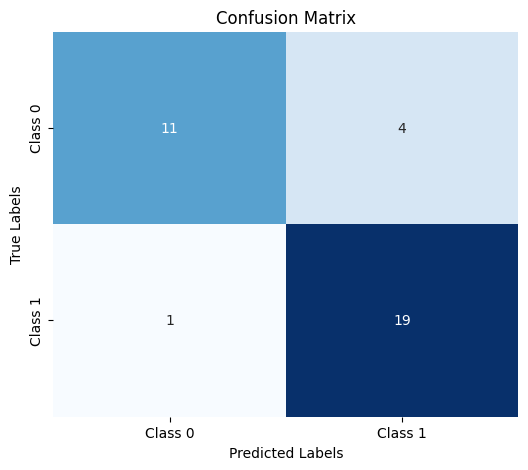

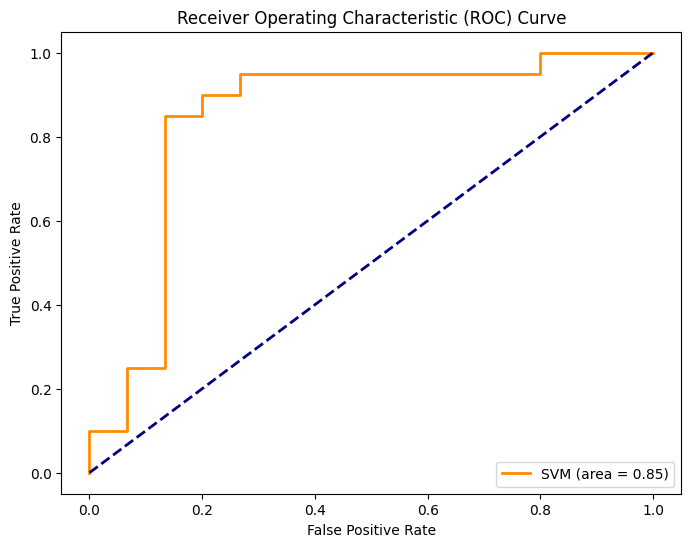

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you already have y_test and y_pred from your SVM model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(x_test))  # using decision function for SVM
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Save SVM and Vectorized

In [55]:
import pickle

pickle.dump(model, open("model.pkl", 'wb'))
pickle.dump(vectorization_data, open('vectorization_data.pkl', 'wb'))

# Load Model and Vectorizer

In [56]:
model = pickle.load(open('model.pkl', 'rb'))
vectorization_data = pickle.load(open('vectorization_data.pkl', 'rb'))

# Detection System

In [57]:
def detect(input_text):
    vectorized_text = vectorization_data.transform([input_text])
    result = model.predict(vectorized_text)
    return "Smishing Detexted" if result[0] == 1 else "No Smishing Detected"

In [58]:
input_text = "Delivery issue: Your package is on hold."
detect(input_text)

'Smishing Detexted'

In [22]:
import sklearn
sklearn.__version__

'1.5.2'